# Bioinformatics 
`Sequence Alignment with affine gap penalties`

By: `Omar Diab`

In [5]:
import numpy as np

In [6]:
def affine_gap_alignment(v, w, score_matrix, gap_open_penalty, gap_extend_penalty):
    m = len(v)
    n = len(w)
    
    # Initialize matrices
    M = np.zeros((m + 1, n + 1))
    IX = np.zeros((m + 1, n + 1))
    IY = np.zeros((m + 1, n + 1))
    
    # Initialize first column and first row with gap penalties
    M[0][0] = 0
    IX[0][0] = gap_open_penalty
    IY[0][0] = gap_open_penalty
    

    for i in range(1, m + 1):
        M[i][0] = -np.inf
        IX[i][0] = gap_open_penalty + i* gap_extend_penalty
        IY[i][0] = -np.inf

    for j in range(1, n + 1):
        M[0][j] = -np.inf
        IX[0][j] = -np.inf
        IY[0][j] = gap_open_penalty + j * gap_extend_penalty


    output_file = "Affine_Gap_output.txt"
    with open(output_file, "w") as f:
        f.write("The Matrices After Initialization: -\n\n")
        f.write("M = \n"+str(M) + "\n\n")
        f.write("IX = \n"+str(IX) + "\n\n")
        f.write("IY = \n"+str(IY) + "\n\n")
        f.write(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            score = score_matrix[v[i-1]][w[j-1]]
            
            M[i][j] = max(
                M[i-1][j-1] + score,
                IX[i-1][j-1] + score,
                IY[i-1][j-1] + score
            )

            IX[i][j] = max(
                M[i-1][j] + gap_open_penalty + gap_extend_penalty,
                IX[i-1][j] + gap_extend_penalty
            )

            IY[i][j] = max(
                M[i][j-1] + gap_open_penalty + gap_extend_penalty,
                IY[i][j-1] + gap_extend_penalty
            )

    with open(output_file, "a") as f:
        f.write("\n\nThe Matrices After Filling: -\n\n")
        f.write("M = \n"+str(M) + "\n\n")
        f.write("IX = \n"+str(IX) + "\n\n")
        f.write("IY = \n"+str(IY) + "\n\n")


    # Traceback to get the alignment
    alignment_v, alignment_w = '', ''
    i, j = m, n

    # Start traceback from the cell with the highest score
    if M[i][j] >= IX[i][j] and M[i][j] >= IY[i][j]:
        current_matrix = 'M'
        max_score = (M[i][j],"M")
    elif IX[i][j] >= M[i][j] and IX[i][j] >= IY[i][j]:
        current_matrix = 'IX'
        max_score = (IX[i][j], "IX")
    else:
        current_matrix = 'IY'
        max_score = (IY[i][j], "IY")

    with open(output_file, "a") as f:
        f.write("\n\nThe Alignment: -\n\n")
        f.write("The Maximum Score: ["+str(max_score[0]) + "] from matrix: ["+str(max_score[1]) + "]\n\n")
        
    while i > 0 or j > 0:

        if current_matrix == 'M':
            if i > 0 and j > 0 and (M[i][j] == (M[i-1][j-1] + score_matrix[v[i-1]][w[j-1]])):
                alignment_v = v[i-1] + alignment_v
                alignment_w = w[j-1] + alignment_w
                i -= 1
                j -= 1

            elif i > 0 and j > 0 and (M[i][j] == (IX[i-1][j-1] + score_matrix[v[i-1]][w[j-1]])):
                current_matrix = 'IX'
                alignment_v = v[i-1] + alignment_v
                alignment_w = w[j-1] + alignment_w
                i-=1
                j-=1

            elif i > 0 and j > 0 and (M[i][j] == (IY[i-1][j-1] + score_matrix[v[i-1]][w[j-1]])):
                current_matrix = 'IY'
                alignment_v = v[i-1] + alignment_v
                alignment_w = w[j-1] + alignment_w
                i-=1
                j-=1
                

        elif current_matrix == 'IX':
            if i > 0 and IX[i][j] == (IX[i-1][j] + gap_extend_penalty):
                current_matrix = 'IX'
                alignment_v = v[i-1] + alignment_v
                alignment_w = '-' + alignment_w
                i -= 1
            else:
                current_matrix = 'M'

        elif current_matrix == 'IY':
            if j > 0 and IY[i][j] == (IY[i][j-1] + gap_extend_penalty):
                current_matrix = 'IY'
                alignment_v = '-' + alignment_v
                alignment_w = w[j-1] + alignment_w
                j -= 1

            else:
                current_matrix = 'M'
                
        
    with open(output_file, "a") as f:
        f.write("".join(alignment_v) + "\n")
        f.write("".join(alignment_w) + "\n\n")
    return max_score, list(alignment_v), list(alignment_w)
    
     

## Example Use: -

In [7]:
GAP_OPENING = -3
GAP_EXTERNSION = -1

# I assumed that the score matrix is a dictionary of dictionaries that contain ths values
score_matrix = {
    'A': {'A': 1, 'C': -1, 'G': -1, 'T': -1},
    'C': {'A': -1, 'C': 1, 'G': -1, 'T': -1},
    'G': {'A': -1, 'C': -1, 'G': 1, 'T': -1},
    'T': {'A': -1, 'C': -1, 'G': -1, 'T': 1}
}

In [8]:

v = 'AAT'
w = 'ACACT'


Max_Start,al_v,alw=affine_gap_alignment(v, w, score_matrix, GAP_OPENING, GAP_EXTERNSION)

print(f"The maximum score is: [{Max_Start[0]}] from matrix: [{Max_Start[1]}]\n")
print("The alignment: -\n")
print(al_v)
print(alw)

The maximum score is: [-4.0] from matrix: [M]

The alignment: -

['-', '-', 'A', 'A', 'T']
['A', 'C', 'A', 'C', 'T']


- **Note:** The log of the Program is automatically saved in an external file named `Question1_output.txt` generated from running the file.

### Illustration for the given Example
Note that: - 
- I selected max value from the 3 matrices in bottom left which is **-4** from matrix **M** as it was the highest value 
- I took only 1 path "The First Traceback result"
as i always check in this sequence:
**(M ==> IX ==> IY)**
- I made this to reduce complexity and Time overhead


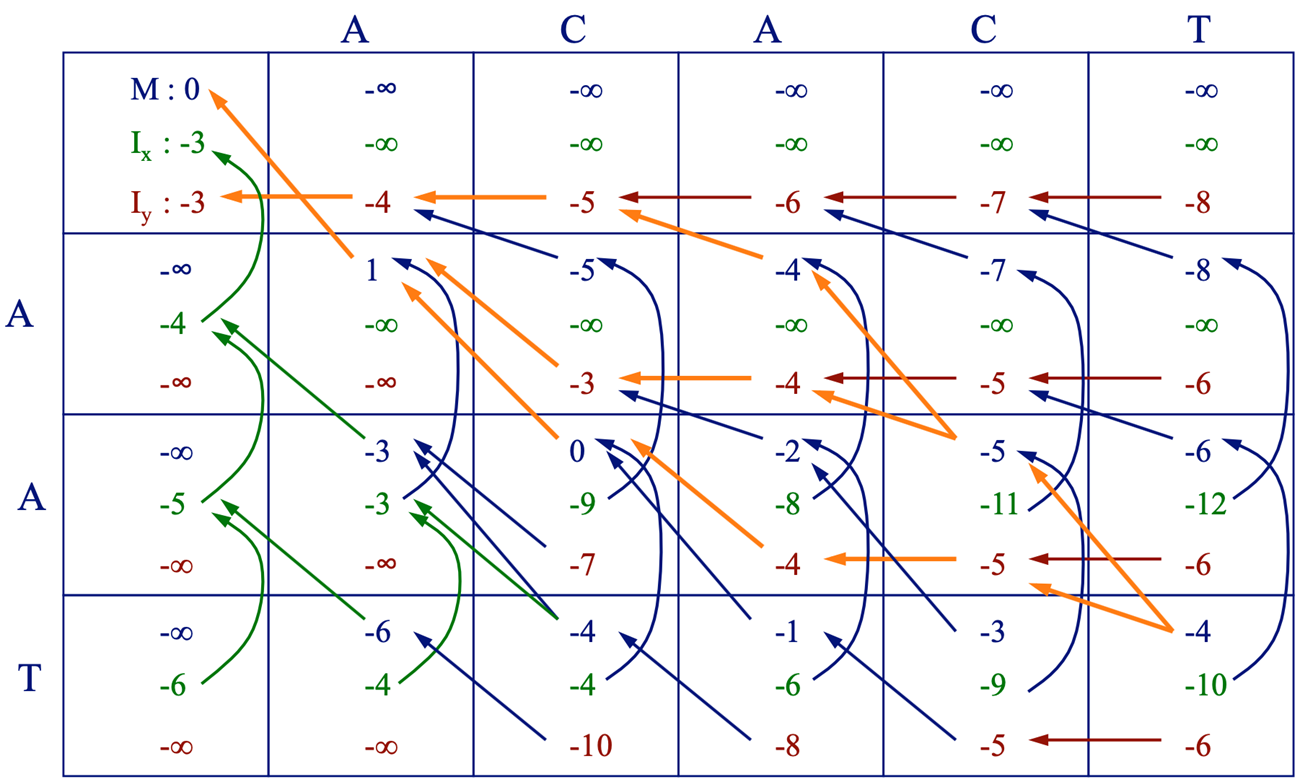